validation set. importa il db di sklearn

In questo progetto utilizzerò il toy database diabetes per predire il libello di progessione della malattia dopo un anno, a partire da 10 variabili misuratte sui pazienti

Importo le varie librerie python che mi potrebbero servire per questo progetto

In [2]:
from sklearn.datasets import load_diabetes
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Scarico il database diabetes

In [3]:
diabetes = load_diabetes()

Analizzo la descrizione che offre sklearn per il toy dataset

In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

utilizzo pandas per dare un primo sguardo ai dati presenti nel dataset

In [5]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
df_min_max = diabetes_df.agg(['min', 'max'])
df_min_max

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.0
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612,346.0


Dopo aver esaminato i dati e i valori massimi e minimi, è stato osservato che i valori sono stati normalizzati. La conferma di ciò è stata ottenuta consultando la documentazione disponibile al seguente link: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

# VISUALIZZAZIONE DATI

Si visualizzano i dati affinchè possiamo capire quale modello di apprendimento poter utilizzare

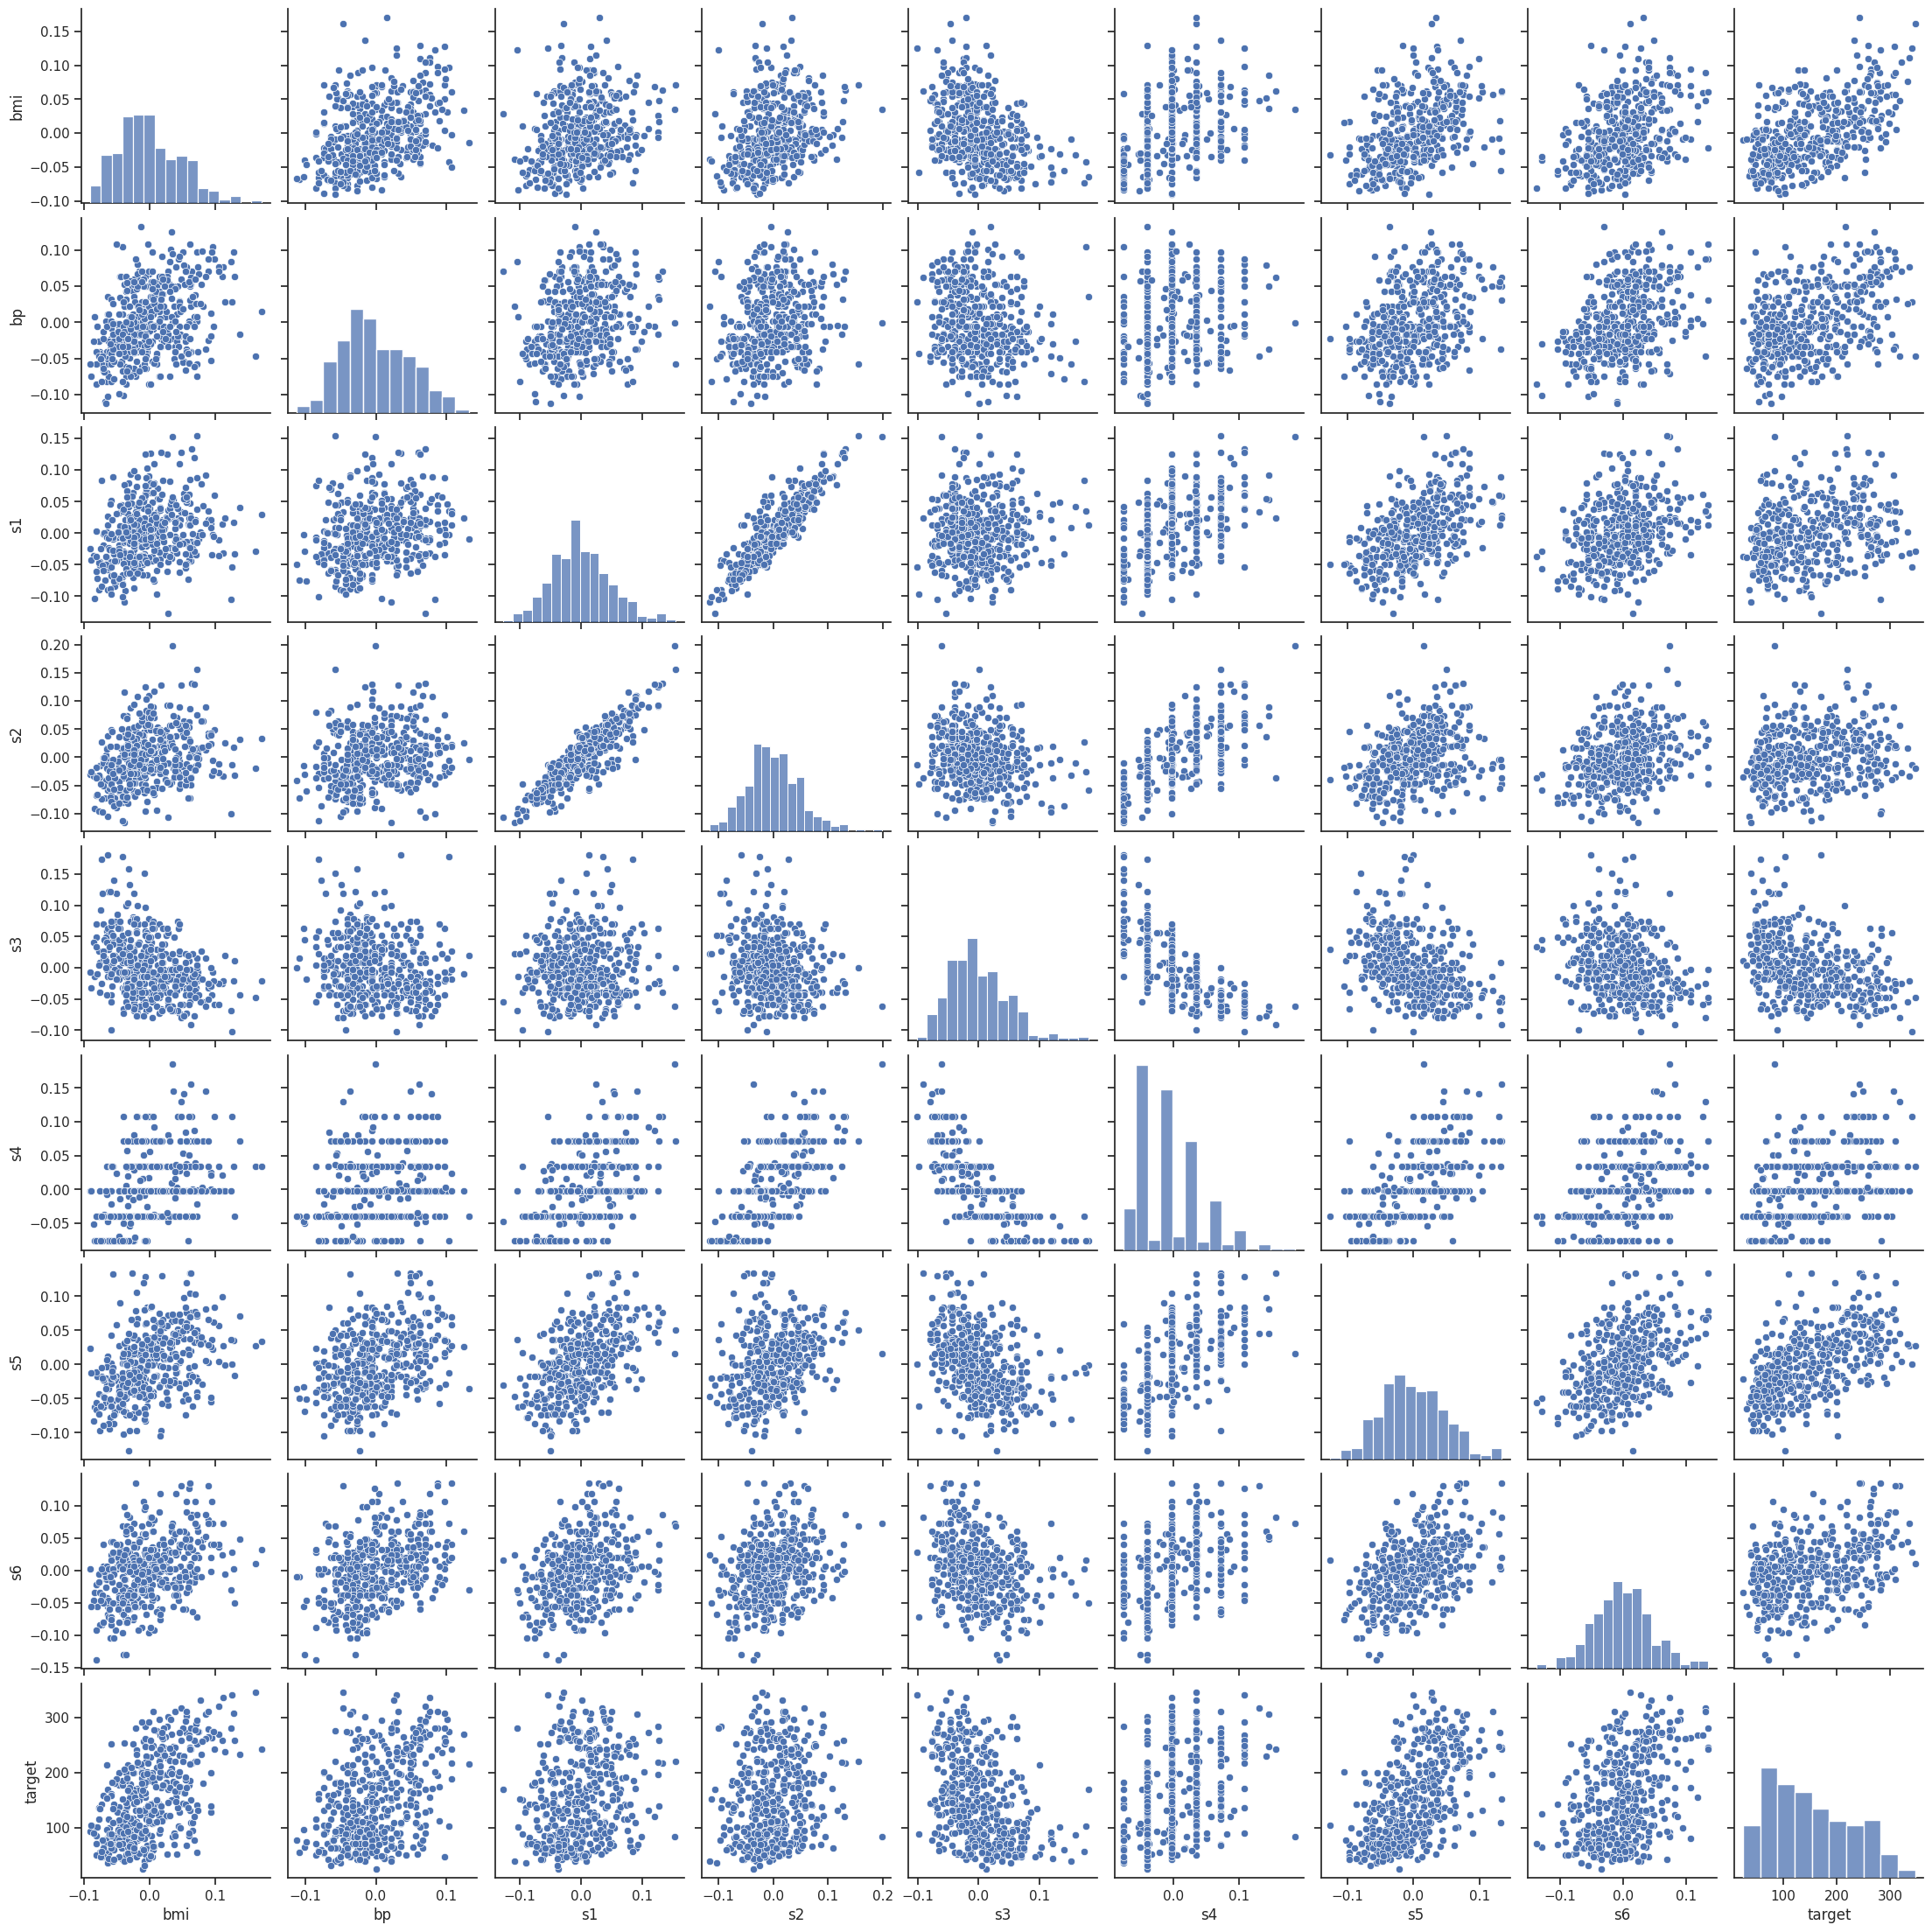

In [7]:
diabetes_df_slice = diabetes_df.loc[:,"bmi":"target"]
sns.set(style="ticks")
sns.pairplot(diabetes_df_slice)
plt.show()

Si procede con l'implementazione dell'heatmap per analizzare la correlazione tra le variabili

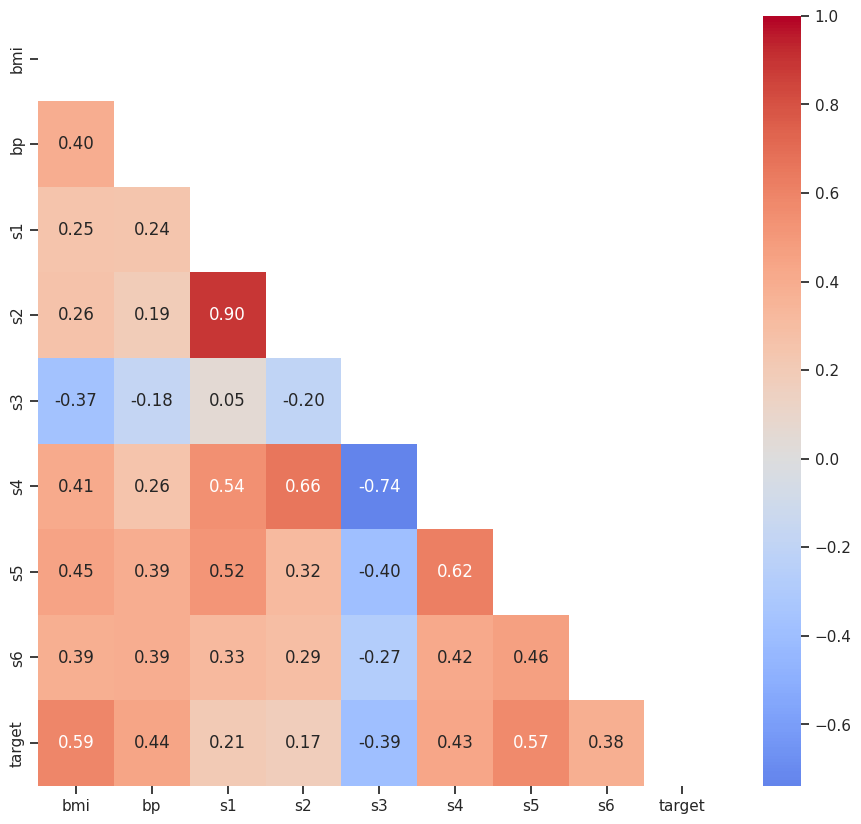

In [8]:
corr = diabetes_df_slice.corr()

def draw_graph_corr(correlation):
    plt.figure(figsize=(11, 10))

    cmap=sns.color_palette("coolwarm", as_cmap=True)
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    sns.heatmap(correlation, mask=mask, vmax=1, center=0, cmap=cmap, annot=True, fmt='.2f')
    plt.show()


draw_graph_corr(corr)

analizzando l'heatmap, si può constatare che:
1. E' presente una correlazione positiva tra il target e le variabili bmi, s4, s5
2. E' presente una correlazione moderata tra il target e le variabili bp, s6
3. E' presente una correlazione debole tra il target e le variabili s1, s2
4. E' presente una correlazione negativa tra il target e la variabile s3

la maggior parte delle variabili hanno una correlazione positiva con il target e avendo una distribuzione lineare approssimata, si potrebbe utilizzare come modello di apprendimento la regressione lineare.
## non so sinceramente come procedere, perchè la regressione lineare non ha un iperparametro vero e proprio, invece ad esempio, l'SVR si, per il momento faccio l'SVR

S'inizia dividendo il dataset in training (70% del dataset) e test set (30% del dataset)

In [9]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Si utilizza la regressione lineare

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.score(X_test, y_test)

y_pred



0.5098364527197639

**PROBABILMENTE I DATI SONO STATI NORMALIZZATI, E' UN BENE PERCHE' NON ABBIAMO PROBLEMI DI POSSIBILI OUTLIERS

SCRIVI PER PIACERE CHE I DATI SONO STATI NORMALIZZATI INSERENDO L'ESEMPIO DEL DB
**

S'inizia dividendo il dataset in training (70% del dataset) e test set (30% del dataset)

In [11]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

carico il modello di apprendimento che per il momento utilizzo l'*SVC*

In [12]:
svr = svm.SVR()

#svr.fit()

inserisco i possibili parametri che gridsearchcv combinerà

In [13]:
parameters = {
    'kernel': ('linear', 'rbf', 'poly'),
    'gamma': [0.001, 0.01, 0.1, 0.5, 0.8, 1, 3],
    'degree': [1,2,3,4,5,6,7,8,9],
    'C': np.logspace(-7, 3, 10)
}

inizio con il cross validation, cercando i migliori valori per gli iperparametri da analizzare:


1.   C
2.   γ
3.   Degree
4.   kernel
  



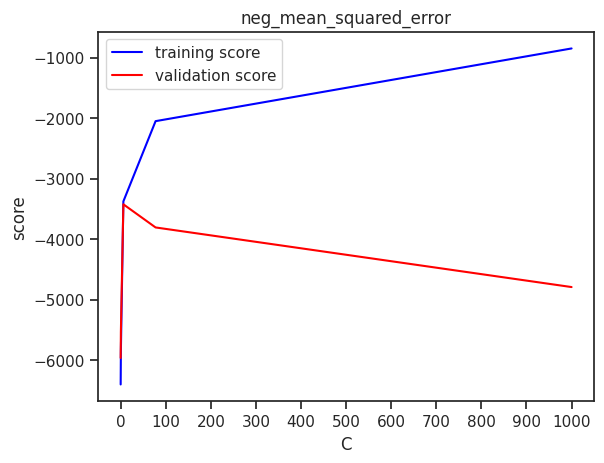

In [25]:
def create_val_curve(param_scoring, hyper_parameter):
  param_range = np.logspace(-7, 3, 10)
  train_score, val_score = validation_curve(
      svm.SVR(), X_train, y_train, param_name=hyper_parameter, param_range=param_range, cv=7, scoring=param_scoring, n_jobs=1
      )

  plt.xticks(np.arange(min(param_range), max(param_range)+1, 100))
  sns.lineplot(x=param_range, y=np.median(train_score, 1), color='blue', label='training score')
  sns.lineplot(x=param_range, y=np.median(val_score, 1), color='red', label='validation score')
  plt.legend(loc='best')
  plt.xlabel(hyper_parameter)
  plt.ylabel('score')
  plt.title(param_scoring)

  plt.show()

create_val_curve("neg_mean_squared_error","C")



ho inserito la mediana perchè le distribuzioni viste nella parte della visualizzazione dei dati, non è del tutto normale

dalla curva si evince che c'è overfitting, poichè si sarebbe trovato un equilibrio tra bias e varianza nel caso in cui le due curve sono asintotiche, invece in questo caso sono divergenti, c'è un enorme overfitting, dovuto molto probabilmente dalla carenza di dati (si vedrà meglio nel learning curve).

utilizzando lo score del MSE (acronimo di Mean Squared Error, Errore Quadrato Medio, è una misura che confronta il valore che è stato predetto con il valore osservato), bisogna prendere il valore più piccolo dello validation score, perchè più il valore è basso più è presente una maggiore accuratezza del modello, quindi un valore tra 50 e 100

Si procede prendendo in considerazione l'iperparametro **γ**

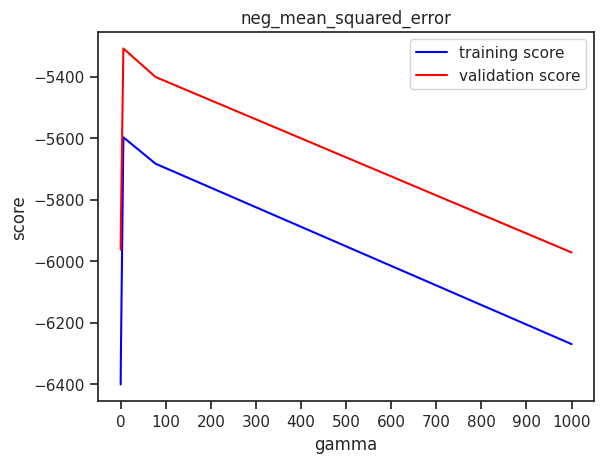

In [22]:
create_val_curve("neg_mean_squared_error","gamma")

in questo grafico è del tutto diverso dal precedente osservato: i valori del validation score sono superiori ai valori del training score, significa che si adatta meglio ai dati sconosciuti (nel nostro caso ai dati di test). entrambi le linee sono asintotiche quindi il valore più basso può portare ad un trade-off tra bias e varianza, quindi considerando il valore più basso di score si trova tra il 50 e il 100

Si procede con la validazione dei valori dell'iperparametro **degree**

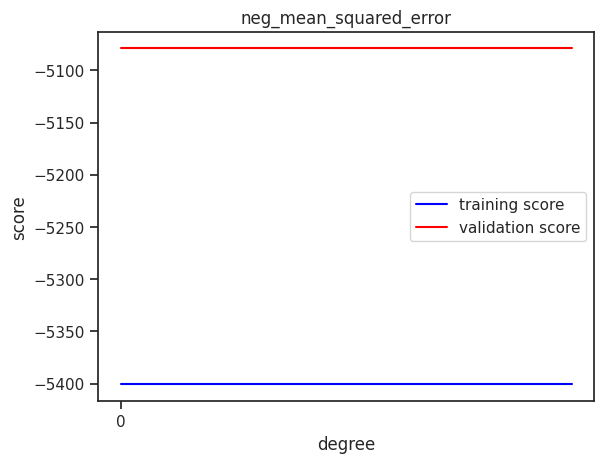

In [28]:
param_range = array_da_0_a_15 = np.arange(100)
train_score, val_score = validation_curve(svm.SVR(), X_train, y_train, param_name="degree", param_range=param_range, cv=7, scoring='neg_mean_squared_error', n_jobs=1)

plt.xticks(np.arange(min(param_range), max(param_range)+1, 100))
sns.lineplot(x=param_range, y=np.median(train_score, 1), color='blue', label='training score')
sns.lineplot(x=param_range, y=np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel("degree")
plt.ylabel('score')
plt.title('neg_mean_squared_error')

plt.show()

in questo grafico si evince come i valori del validation score sono superiori ai valori del training score, non sono asintotici, quindi c'è una possibilità di overfitting. non è molto comprensibile qual è il miglior valore per questo parametro, la GridSearchCV ci potrebbe aiutare.

infine si passa all'osservazione del kernel

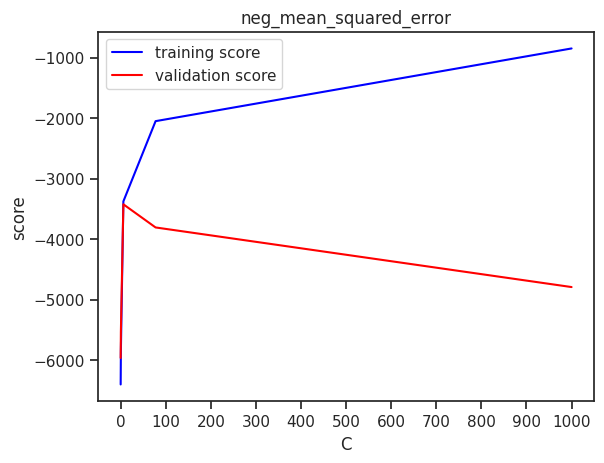

In [29]:
param_range = np.logspace(-7, 3, 10)
train_score, val_score = validation_curve(
      svm.SVR(kernel="rbf"), X_train, y_train, param_name="C", param_range=param_range, cv=7, scoring='neg_mean_squared_error', n_jobs=1
      )

plt.xticks(np.arange(min(param_range), max(param_range)+1, 100))
sns.lineplot(x=param_range, y=np.median(train_score, 1), color='blue', label='training score')
sns.lineplot(x=param_range, y=np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel("C")
plt.ylabel('score')
plt.title('neg_mean_squared_error')

plt.show()

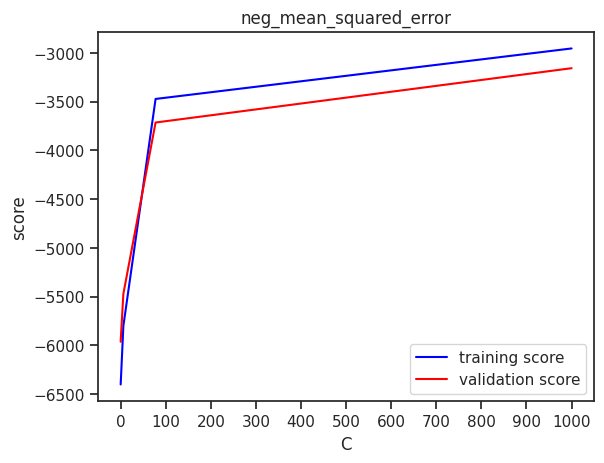

In [33]:
param_range = np.logspace(-7, 3, 10)
train_score, val_score = validation_curve(
      svm.SVR(kernel="linear"), X_train, y_train, param_name="C", param_range=param_range, cv=7, scoring='neg_mean_squared_error', n_jobs=1
      )

plt.xticks(np.arange(min(param_range), max(param_range)+1, 100))
sns.lineplot(x=param_range, y=np.median(train_score, 1), color='blue', label='training score')
sns.lineplot(x=param_range, y=np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel("C")
plt.ylabel('score')
plt.title('neg_mean_squared_error')

plt.show()

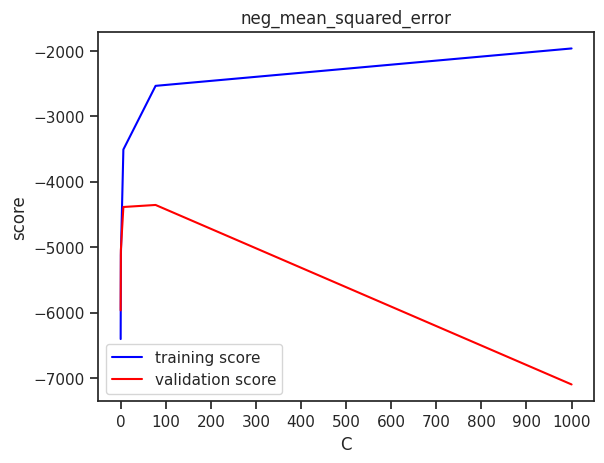

In [31]:
param_range = np.logspace(-7, 3, 10)
train_score, val_score = validation_curve(
      svm.SVR(kernel="poly"), X_train, y_train, param_name="C", param_range=param_range, cv=7, scoring='neg_mean_squared_error', n_jobs=1
      )

plt.xticks(np.arange(min(param_range), max(param_range)+1, 100))
sns.lineplot(x=param_range, y=np.median(train_score, 1), color='blue', label='training score')
sns.lineplot(x=param_range, y=np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel("C")
plt.ylabel('score')
plt.title('neg_mean_squared_error')

plt.show()

dopo creato i parametri, posso darli in pasto a *GridsearchCV*

In [15]:
clf = GridSearchCV(svm.SVR(), parameters, cv=5)

faccio il training di dati con la gridsearchcv

In [16]:
clf.fit(X_train, y_train)
clf.best_estimator_, clf.best_score_

(SVR(C=1000.0, degree=2, gamma=0.001, kernel='linear'), 0.4529105731825272)

ho ottenuto questi parametri:
1.   C=100
2.   degree=2
3.   gamma=3

adesso vedrò la precisione con i dati di training e poi con quelli di test


In [17]:
new_svr = svm.SVR(C=1000, gamma=0.001, degree=2)
new_svr.fit(X_train, y_train)
new_svr.score(X_test, y_test)

0.031392302216669